In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574/BME574_HW`


In [2]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS","StatsBase"])

   Resolving package versions...
  No Changes to `~/BME574/BME574_HW/Project.toml`
  No Changes to `~/BME574/BME574_HW/Manifest.toml`


In [3]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS, StatsBase

In [4]:
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [5]:
col_list = Vector{Float64}[]
for p in 0:19
    push!(col_list, x .^ p)
end
A = reduce(hcat,col_list)

100×20 Matrix{Float64}:
 1.0  0.0         0.0          0.0          …  0.0          0.0
 1.0  0.040404    0.00163249   6.5959e-5       8.23467e-26  3.32714e-27
 1.0  0.0808081   0.00652995   0.000527672     2.15867e-20  1.74438e-21
 1.0  0.121212    0.0146924    0.00178089      3.19028e-17  3.86701e-18
 1.0  0.161616    0.0261198    0.00422138      5.65882e-15  9.14557e-16
 1.0  0.20202     0.0408122    0.00824488   …  3.14128e-13  6.34602e-14
 1.0  0.242424    0.0587695    0.0142472       8.36313e-12  2.02743e-12
 1.0  0.282828    0.0799918    0.022624        1.34095e-10  3.79257e-11
 1.0  0.323232    0.104479     0.033771        1.48343e-9   4.79491e-10
 1.0  0.363636    0.132231     0.0480841       1.23598e-8   4.49447e-9
 1.0  0.40404     0.163249     0.065959     …  8.23467e-8   3.32714e-8
 1.0  0.444444    0.197531     0.0877915       4.57841e-7   2.03485e-7
 1.0  0.484848    0.235078     0.113977        2.19234e-6   1.06295e-6
 ⋮                                          ⋱       

In [6]:
# alternative way of constructing the matrix
A2 = zeros(100,20)
for i in 1:100
    for j in 1:20
        A2[i,j] = x[i]^(j-1)
    end
end

In [7]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [8]:
Ainv = pinv(A)

20×100 Matrix{Float64}:
   0.621988      0.371739     0.186871    …  -0.0319415     0.014319
  -7.08141      -2.76444      0.186811        0.977262     -0.441712
  22.9104        6.42651     -4.29981        -5.42479       2.47063
 -23.3642       -4.48671      7.24669         9.00331      -4.14145
  -5.77441      -2.17973      0.366123       -0.640251      0.336491
  14.5041        2.20874     -5.2547      …  -7.1448        3.30397
   9.11428       2.16093     -2.29237        -1.8781        0.824818
  -8.02308      -0.79471      3.44865         5.78788      -2.71146
 -11.0479       -1.98943      3.59411         4.43746      -2.02942
   3.7694        0.125227    -1.92984        -4.14979       1.97488
  11.0234        1.75592     -3.87379     …  -5.57858       2.58268
  -4.29753      -0.307776     1.98402         4.32186      -2.06418
  -9.46549      -1.52694      3.29874         4.80678      -2.22624
  12.0538        1.62068     -4.60401        -8.28594       3.91361
  -6.88133      -0.8

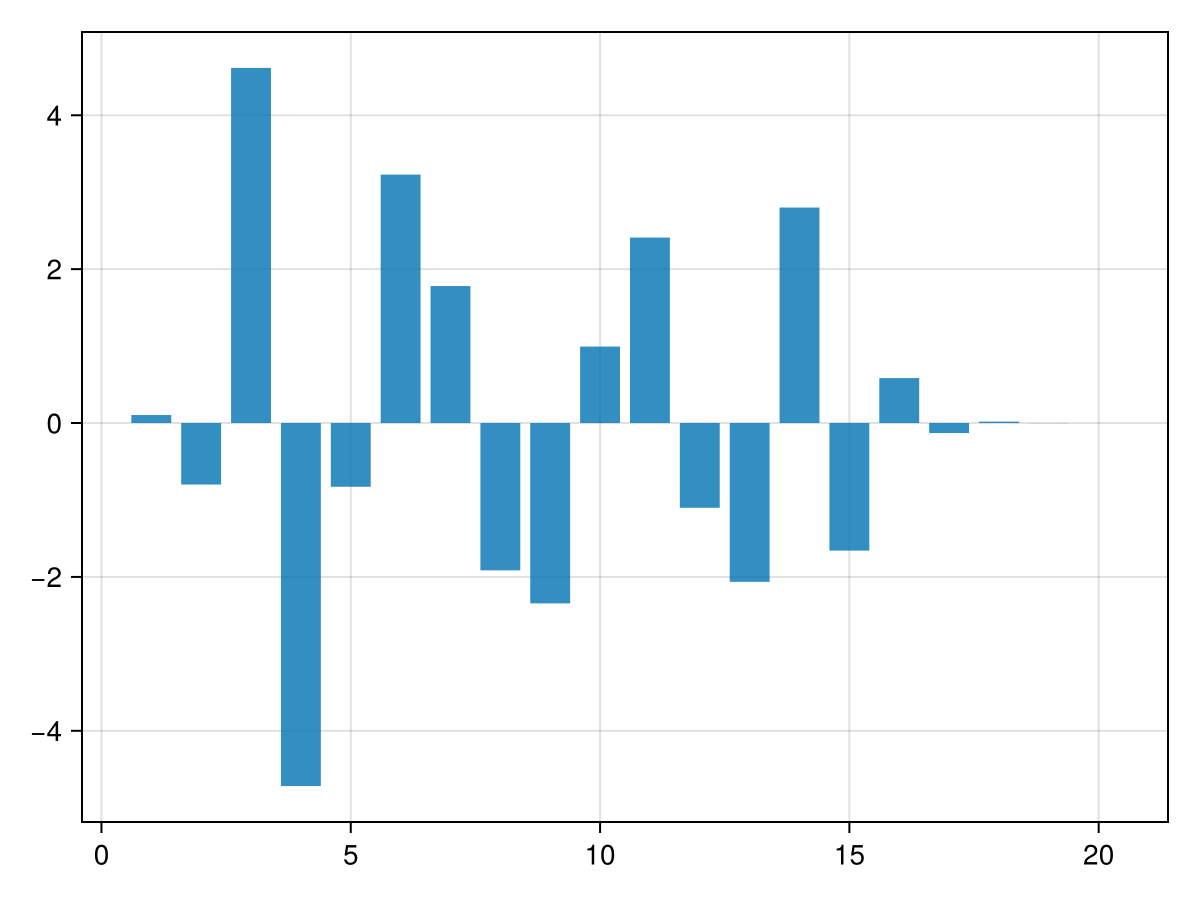

In [9]:
y1 = y .+ rand(Normal(0,0.1),length(y))
b1 = Ainv * y1
barplot(b1)

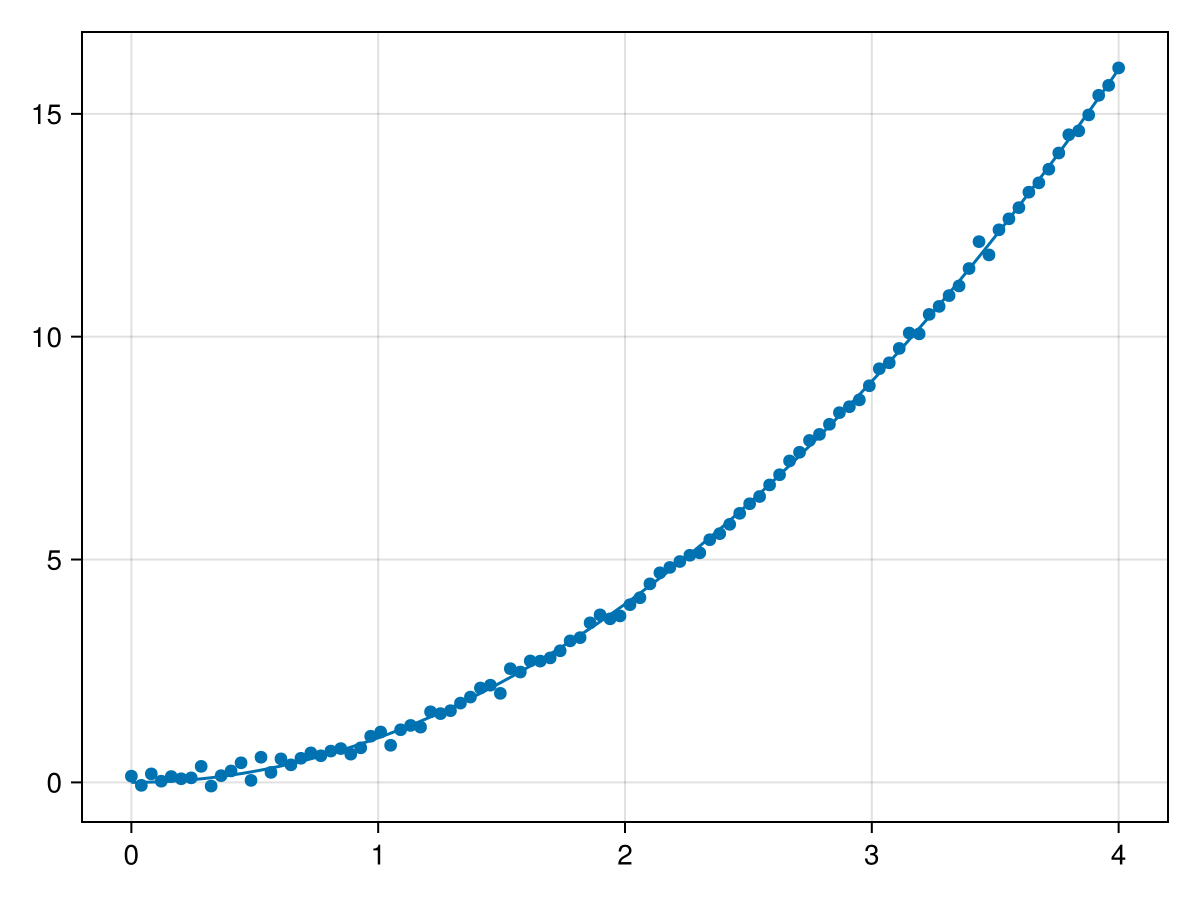

In [10]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,x,y)
plot!(ax,x,y1)
fig

In [11]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [12]:
b10ls = lasso(A[:,1:10],y1,0.1,0)
b10lq = fitlq(A[:,1:10],y1)

10-element Vector{Float64}:
   0.0938758639980774
  -0.7120982302718826
   5.645469552521689
 -12.390058710206063
  16.187389349821075
 -11.742353766256429
   4.974615174115044
  -1.2240221437730057
   0.16202004735658093
  -0.008919559082133932

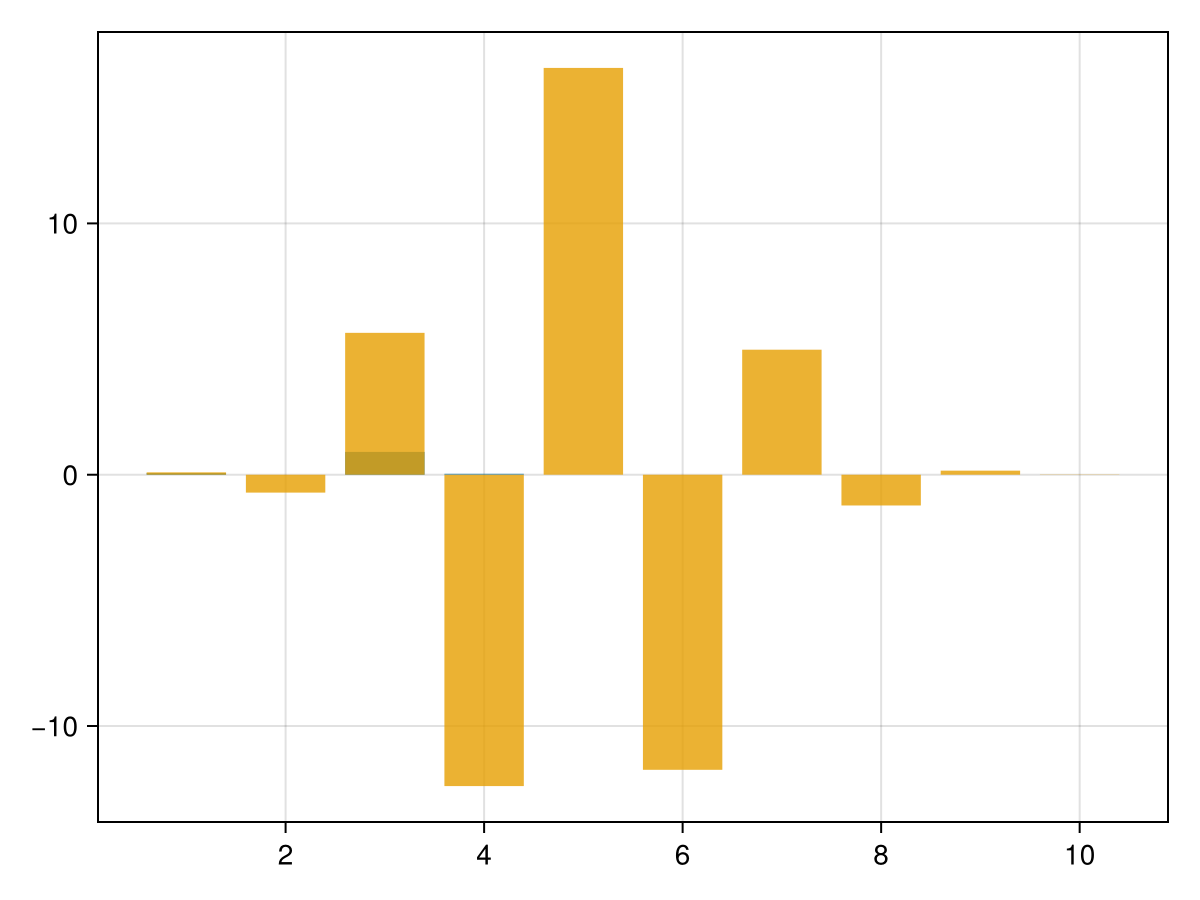

In [13]:
barplot(b10ls)
barplot!(b10lq)
current_figure()

In [14]:
xx = LinRange(0,8,200)
yy = xx .^2
yye = yy + rand(Normal(0,0.1),length(yy))

200-element Vector{Float64}:
  0.10415159331597579
  0.05536224612175688
  0.17141582590820298
 -0.03797513839164113
  0.10243526575764038
  0.06046457462366209
 -0.10572239007485083
  0.11104087310969854
  0.15497047023547728
  0.09416635164338816
  0.09666047619086611
  0.04816498776999087
  0.4304433658921193
  ⋮
 57.07637995844757
 57.743517430523234
 58.38009504541794
 58.94797273902456
 59.59253755213793
 60.261488759104175
 60.89146159146418
 61.4137325558604
 62.134276687166086
 62.71977783823357
 63.30863443997222
 63.97402652718392

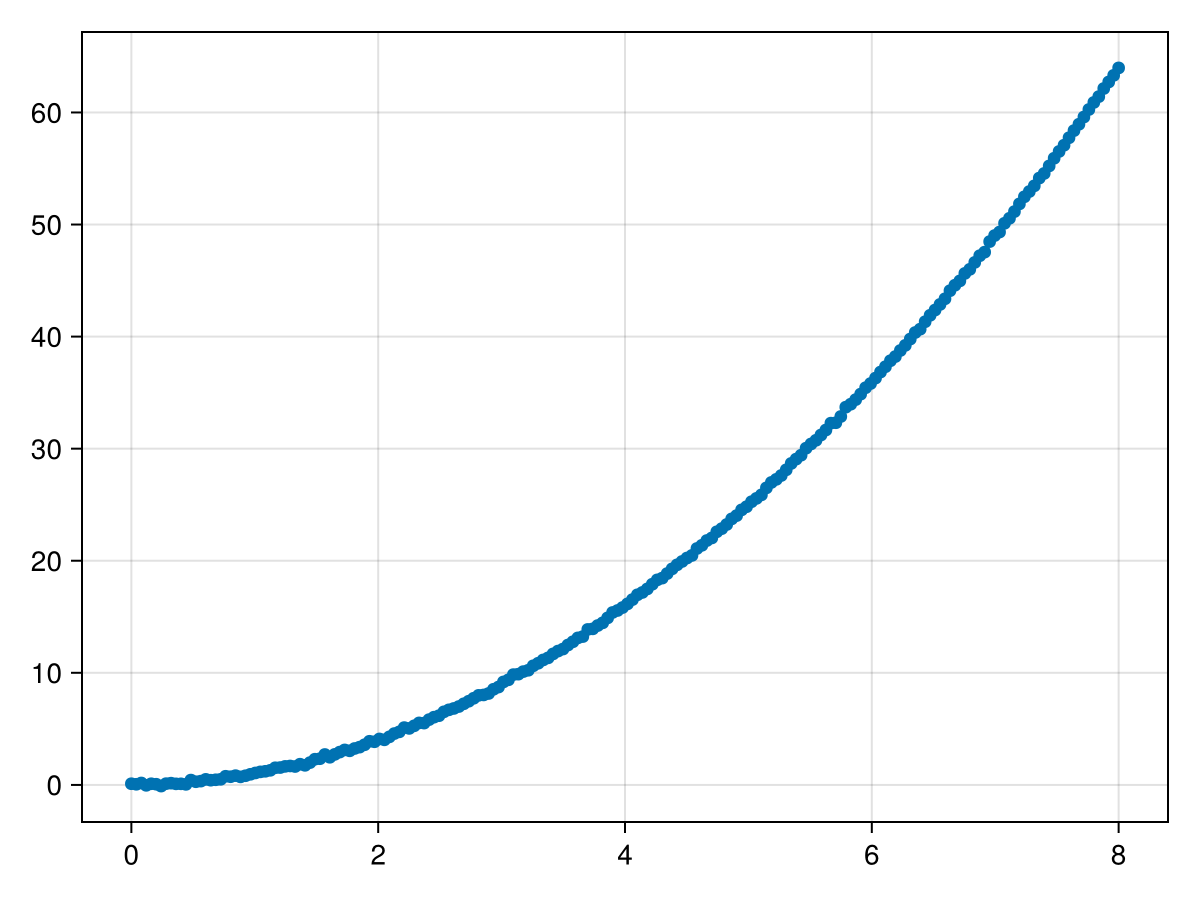

In [15]:
scatter(xx,yye)

In [16]:
# alternative way of constructing the matrix
AA = zeros(200,20)
for i in 1:200
    for j in 1:20
        AA[i,j] = xx[i]^(j-1)
    end
end

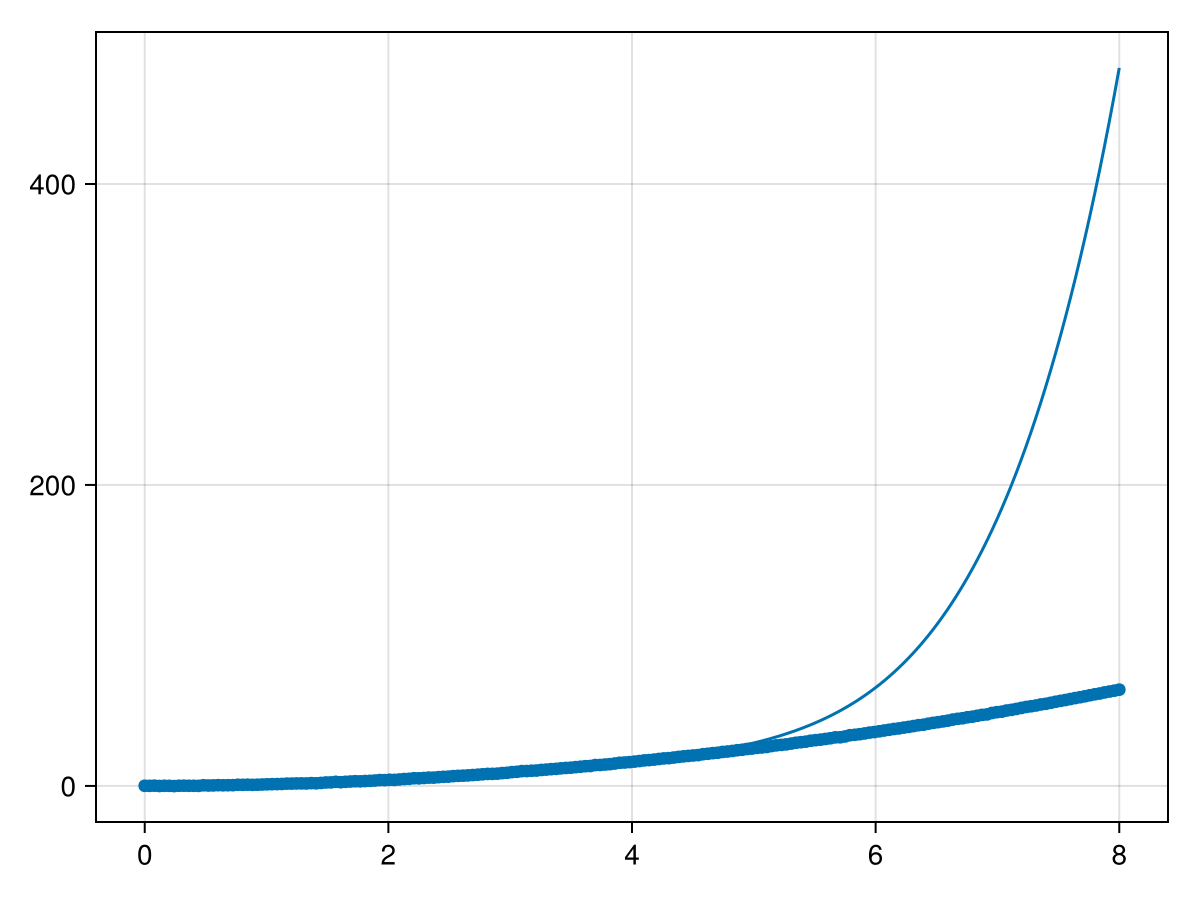

In [17]:
dp = 7
blq = fitlq(A2[:,1:dp],yye[1:100])
y_ex = AA[:,1:dp]*blq
scatter(xx,yye)
lines!(xx,y_ex)
current_figure()

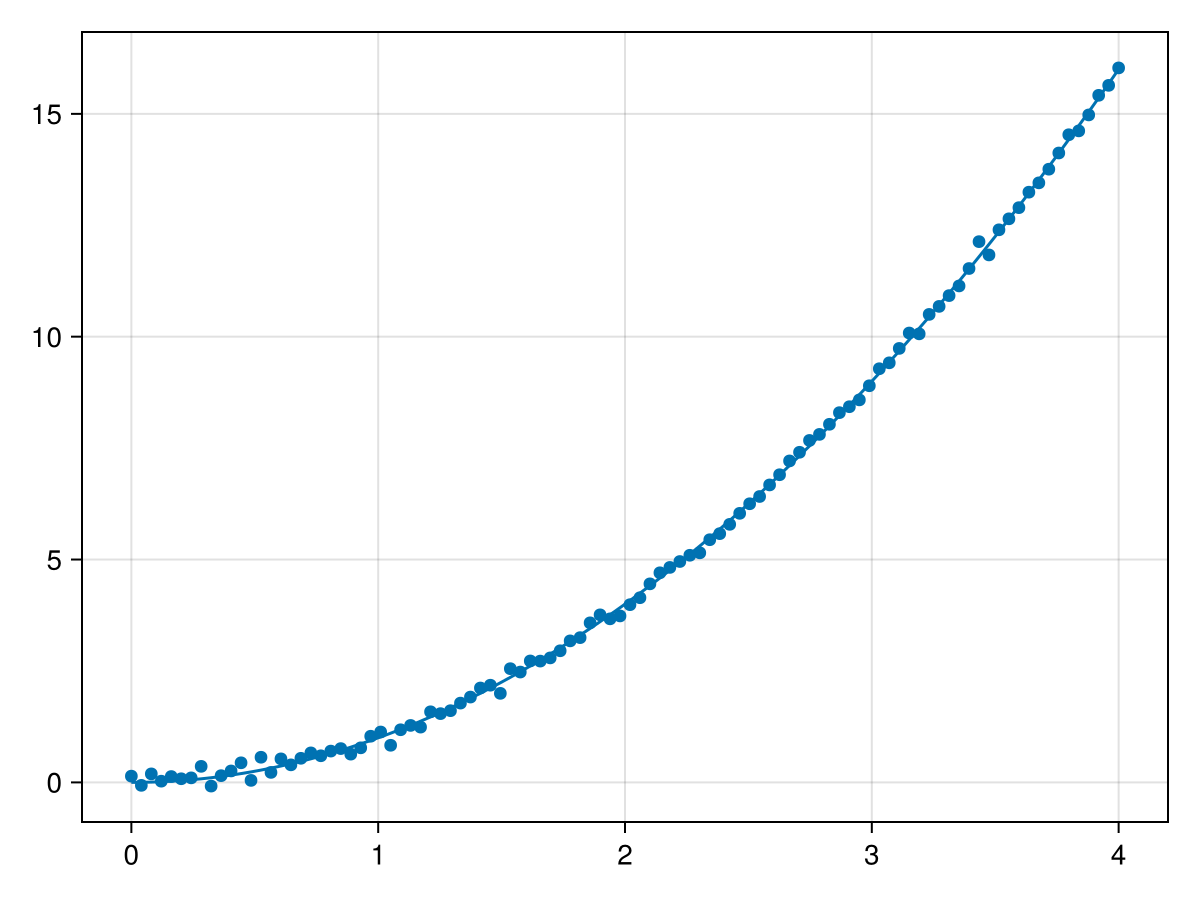

In [18]:
# k-fold strategy
scatter(x,y1)
lines!(x,y)
current_figure()

In [19]:
dp = 5
blq_list = []
for s in 1:100
    xy_sample = sample(collect(zip(x,y1)), 80, replace=false)
    A_sample = zeros(80,20)
    for i in 1:80
        for j in 1:20
            A_sample[i,j] = xy_sample[i][1]^(j-1)
        end
    end
    y_sample = [xy[2] for xy in xy_sample]
    blq = fitlq(A_sample[:,1:dp],y_sample)
    push!(blq_list, blq)
end

In [20]:
blq_m = reduce(hcat, blq_list)

5×100 Matrix{Float64}:
  0.0215953   0.0543517   0.063264     …   0.0941048    0.0978368
  0.13389    -0.140932   -0.134477        -0.123503    -0.138411
  0.772956    1.1137      1.07424          1.0355       1.02653
  0.100339   -0.0348544  -0.0134654        0.00136876   0.0103984
 -0.0133203   0.0034579   0.000518917     -0.00112566  -0.00249792

In [21]:
blq_mean = mean(blq_m, dims=2)

5×1 Matrix{Float64}:
  0.09034695853968933
 -0.10989716697594748
  1.0181802205166346
  0.010193546083259637
 -0.002414476746570507

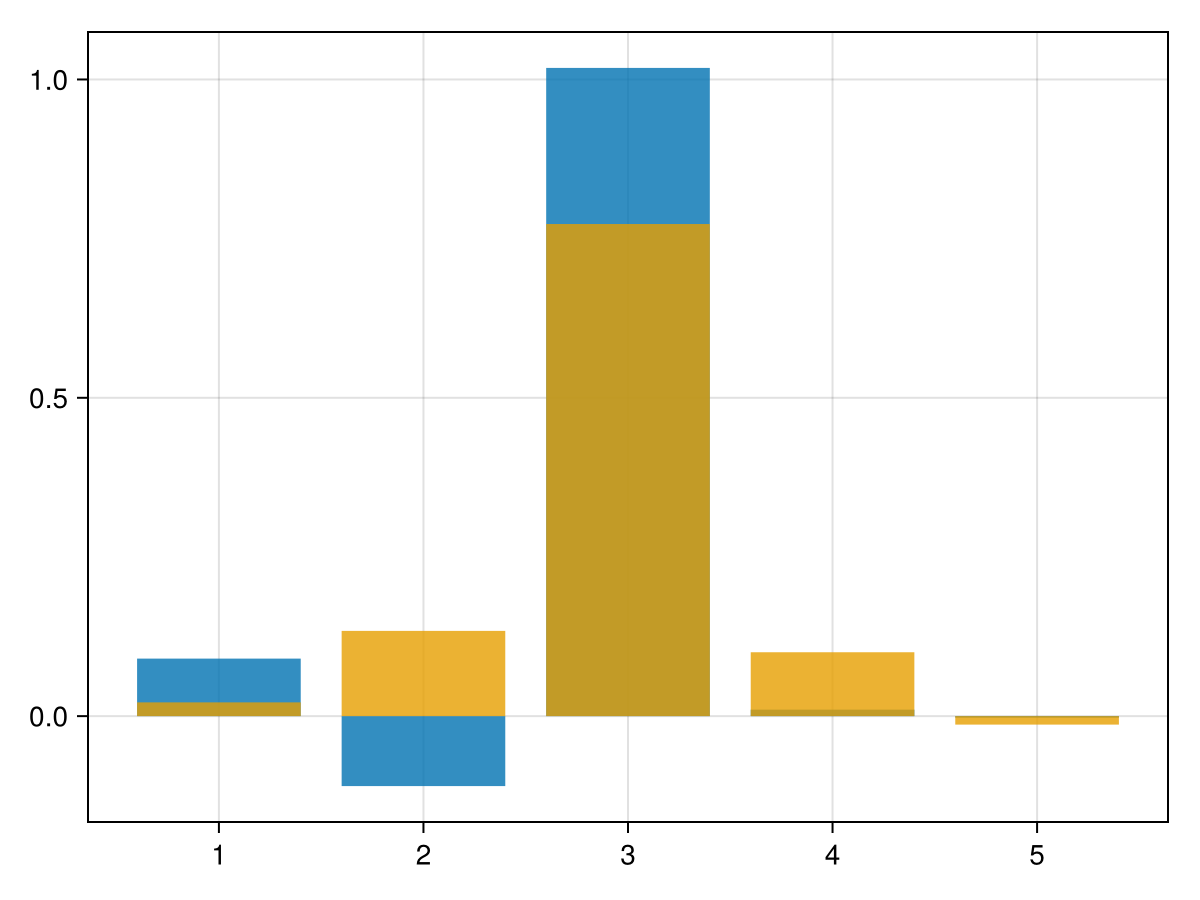

In [22]:
barplot(vec(blq_mean),label="mean")
barplot!(blq_m[:,1])
current_figure()

---
---

# Hw 4
Please take RegressionCurveFitting.jl and extend it to produce the graphs 4.14 a) (least squares) and 4.14 c) (LASSO) regression? Produce 100 realizations of the data (different noise), and perform regressions with different degree of polynomial fit functions. The two plots display the boxplot of the distributions of fitting parameters of the combined trials (you must find the appropriate plotting function in Makie.jl). You receive extra credit if you also plot the error distribution of both methods as in Fig. 4.15.

In [38]:
# in recreating the plot, we will calculate 20 polynomial parameters
dp = 20

#initalize storage for all runs of our fitting funciton calls
βs_lqs = zeros(100,20)
βs_lass = zeros(100,20)

err_lqs = zeros(100)
err_lass = zeros(100)

# iterate over 100 realizations
for r = 1:100
    # create a new realization by creating a newly noised representation of the model
    y_r = (x.^2) + rand(Normal(0,0.1),length(x))
    # store the outputs for each fitting method as a row in the storage variables
    βs_lqs[r,:] = fitlq(A[:,1:dp],y_r)
    βs_lass[r,:] = lasso(A[:,1:dp],y_r,0.1,0)
    # calc the f(x) and calculate error
    err_lqs[r] = norm(y_r-(A[:,1:dp]*βs_lqs[r,:]))/norm(y_r)
    err_lass[r] = norm(y_r-(A[:,1:dp]*βs_lass[r,:]))/norm(y_r)
end

#= #earlier attempt at graphing
# create x axis for the graphs
x_g = rand(1:β,100*β)

# create figure for box blots
figbox = Figure()

# create the two axes for our plots
ax1 = Axis(figbar[1,1],title = "Least Squares")
ax2 = Axis(figbar[2,1],title = "Lasso")

boxplot(ax1,x_g,vcat(βs_lqs))
boxplot!(ax2,x_g,vcat(βs_lass)) =#

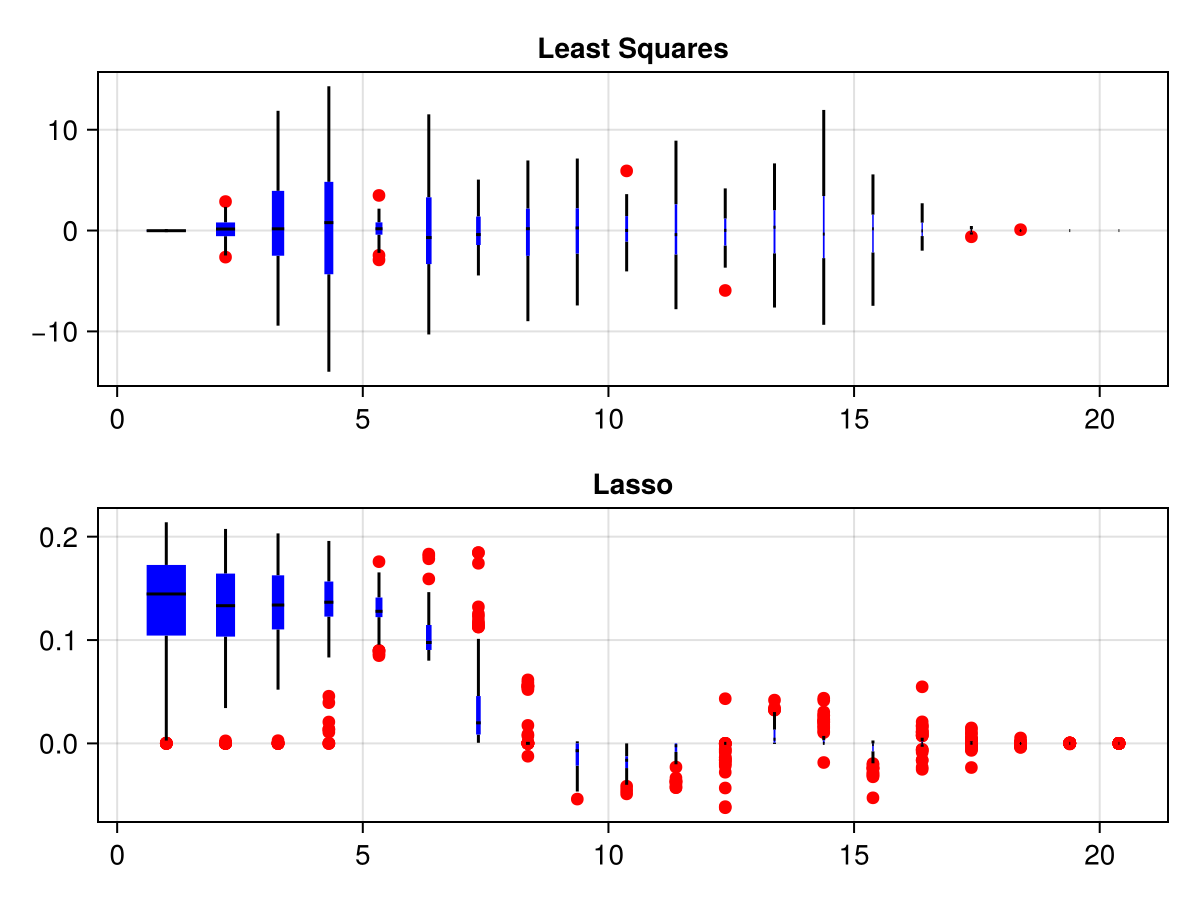

In [39]:
# create figure for box blots
figbox = Figure()

# create the two axes for our plots
ax1 = Axis(figbox[1,1],title = "Least Squares")
ax2 = Axis(figbox[2,1],title = "Lasso")

for i in 1:20
    boxplot!(ax1, i*ones(100), βs_lqs[:, i]; dodge=i, orientation=:vertical,color=:blue,outliercolor=:red)
    boxplot!(ax2, i*ones(100), βs_lass[:, i]; dodge=i, orientation=:vertical,color=:blue,outliercolor=:red)
end

figbox

In [36]:
# attempt at extra credit

# create figure for box blots
figerr = Figure()

# create the two axes for our plots
axx1 = Axis(figerr[1,1],title = "Least Squares")
axx2 = Axis(figerr[2,1],title = "Lasso")

for i in 1:20
    boxplot!(axx1, i*ones(100), err_lqs[i]; dodge=i, orientation=:vertical,color=:blue,outliercolor=:red)
    boxplot!(axx2, i*ones(100), err_lass[i]; dodge=i, orientation=:vertical,color=:blue,outliercolor=:red)
end

figerr

LoadError: MethodError: no method matching view(::Float64, ::Vector{Int64})

[0mClosest candidates are:
[0m  view([91m::LinearAlgebra.AbstractQ[39m, ::Any...)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.4+0.x64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mabstractq.jl:111[24m[39m
[0m  view([91m::FillArrays.AbstractFill[39m, ::Any...)
[0m[90m   @[39m [32mFillArrays[39m [90m~/.julia/packages/FillArrays/lVl4c/src/[39m[90m[4mFillArrays.jl:830[24m[39m
[0m  view([91m::ChainRulesCore.AbstractZero[39m, ::Any...)
[0m[90m   @[39m [33mChainRulesCore[39m [90m~/.julia/packages/ChainRulesCore/6Pucz/src/tangent_types/[39m[90m[4mabstract_zero.jl:44[24m[39m
[0m  ...
